<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot" data-toc-modified-id="Plot-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot</a></span></li><li><span><a href="#Data-augmentation" data-toc-modified-id="Data-augmentation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data augmentation</a></span></li><li><span><a href="#Test-time-augmentation-(TTA)" data-toc-modified-id="Test-time-augmentation-(TTA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Test time augmentation (TTA)</a></span></li><li><span><a href="#Albumentations" data-toc-modified-id="Albumentations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Albumentations</a></span><ul class="toc-item"><li><span><a href="#Пример" data-toc-modified-id="Пример-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Пример</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#TTA" data-toc-modified-id="TTA-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>TTA</a></span></li></ul></li><li><span><a href="#Домашнее-задание" data-toc-modified-id="Домашнее-задание-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Домашнее задание</a></span></li><li><span><a href="#Интерпретация-CNN" data-toc-modified-id="Интерпретация-CNN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Интерпретация CNN</a></span><ul class="toc-item"><li><span><a href="#Saliency-map" data-toc-modified-id="Saliency-map-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Saliency map</a></span></li><li><span><a href="#Feature-maps" data-toc-modified-id="Feature-maps-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Feature maps</a></span></li><li><span><a href="#Activation-map" data-toc-modified-id="Activation-map-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Activation map</a></span></li><li><span><a href="#Lime" data-toc-modified-id="Lime-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Lime</a></span></li><li><span><a href="#SHAP" data-toc-modified-id="SHAP-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>SHAP</a></span></li></ul></li></ul></div>

# Plot

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Загрузка и предобработка данных CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Filter the data and labels for "dog" and "cat" classes
dog_cat_indices_train = np.logical_or(y_train[:, 3] == 1, y_train[:, 5] == 1)
dog_cat_indices_test = np.logical_or(y_test[:, 3] == 1, y_test[:, 5] == 1)
x_train_dog_cat = x_train[dog_cat_indices_train]
y_train_dog_cat = y_train[dog_cat_indices_train][:, [3, 5]]  # Keep only "dog" and "cat" labels
x_test_dog_cat = x_test[dog_cat_indices_test]
y_test_dog_cat = y_test[dog_cat_indices_test][:, [3, 5]]  # Keep only "dog" and "cat" labels

x_train = x_train_dog_cat.copy()
x_test = x_test_dog_cat.copy()
y_train = y_train_dog_cat.copy()
y_test = y_test_dog_cat.copy()

# Загрузка предобученной модели VGG16 без верхних слоев
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Замораживание весов предобученной модели
for layer in base_model.layers:
    layer.trainable = False

# Создание новой модели на основе предобученной модели
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 units for "dog" and "cat"

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
79/79 [==============================] - 26s 319ms/step - loss: 0.5997 - accuracy: 0.6750 - val_loss: 0.5549 - val_accuracy: 0.7115
Epoch 2/20
79/79 [==============================] - 35s 447ms/step - loss: 0.5549 - accuracy: 0.7124 - val_loss: 0.5439 - val_accuracy: 0.7100
Epoch 3/20
79/79 [==============================] - 34s 432ms/step - loss: 0.5404 - accuracy: 0.7217 - val_loss: 0.5405 - val_accuracy: 0.7155
Epoch 4/20
79/79 [==============================] - 31s 399ms/step - loss: 0.5264 - accuracy: 0.7345 - val_loss: 0.5373 - val_accuracy: 0.7190
Epoch 5/20
79/79 [==============================] - 31s 394ms/step - loss: 0.5178 - accuracy: 0.7403 - val_loss: 0.5370 - val_accuracy: 0.7200
Epoch 6/20
79/79 [==============================] - 37s 467ms/step - loss: 0.5042 - accuracy: 0.7515 - val_loss: 0.5351 - val_accuracy: 0.7280
Epoch 7/20
79/79 [==============================] - 47s 596ms/step - loss: 0.4929 - accuracy: 0.7570 - val_loss: 0.5452 - val_accuracy: 0.7255

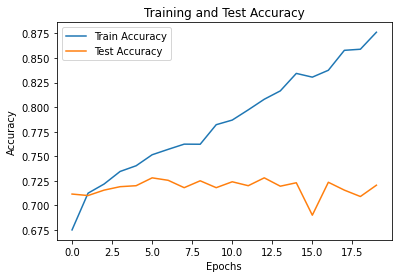

In [2]:
# Визуализация графика точности на обучающей и тестовой выборках
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

# Data augmentation

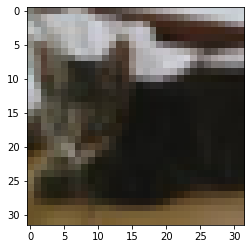

In [3]:
# Исходное изображение
plt.imshow(x_train[0])

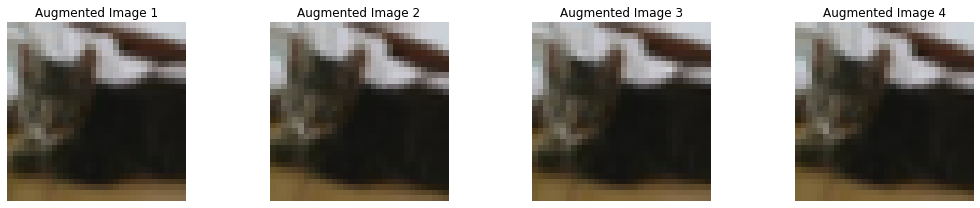

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

image_array = np.expand_dims(x_train[0], axis=0)

# Создание генератора аугментации с различными параметрами
datagen = ImageDataGenerator(
    rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     zoom_range=0.2,
)

# Генерация аугментированных изображений
augmented_images = datagen.flow(image_array, batch_size=1)

# Отображение примеров аугментации
num_examples = 4
fig, axes = plt.subplots(1, num_examples, figsize=(15, 3))

for i in range(num_examples):
    augmented_image = augmented_images.next()[0]
    axes[i].imshow(augmented_image)
    axes[i].axis('off')
    axes[i].set_title(f'Augmented Image {i + 1}')

plt.tight_layout()
plt.show()

In [5]:
# Создание генератора аугментированных изображений
datagen = ImageDataGenerator(
    rotation_range=20,                 # Диапазон случайных поворотов изображений
    zoom_range=0.2,                    # Диапазон случайного масштабирования изображений
    width_shift_range=0.2,             # Диапазон случайного сдвига изображений по горизонтали
    height_shift_range=0.2,            # Диапазон случайного сдвига изображений по вертикали
    horizontal_flip=True,              # Случайное отражение изображений по горизонтали
)

# Загрузка предобученной модели VGG16 без верхних слоев
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Замораживание весов предобученной модели
for layer in base_model.layers:
    layer.trainable = False

# Создание новой модели на основе предобученной модели
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели с использованием аугментации данных
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    steps_per_epoch=len(x_train) // 128,
    epochs=20,
    validation_data=(x_test, y_test)
)

Epoch 1/20
78/78 [==============================] - 49s 602ms/step - loss: 0.6289 - accuracy: 0.6408 - val_loss: 0.5696 - val_accuracy: 0.6960
Epoch 2/20
78/78 [==============================] - 50s 643ms/step - loss: 0.5929 - accuracy: 0.6794 - val_loss: 0.5754 - val_accuracy: 0.6855
Epoch 3/20
78/78 [==============================] - 51s 650ms/step - loss: 0.5892 - accuracy: 0.6831 - val_loss: 0.5593 - val_accuracy: 0.7060
Epoch 4/20
78/78 [==============================] - 57s 725ms/step - loss: 0.5830 - accuracy: 0.6915 - val_loss: 0.5470 - val_accuracy: 0.7195
Epoch 5/20
78/78 [==============================] - 44s 556ms/step - loss: 0.5800 - accuracy: 0.6903 - val_loss: 0.5474 - val_accuracy: 0.7230
Epoch 6/20
78/78 [==============================] - 56s 719ms/step - loss: 0.5774 - accuracy: 0.6944 - val_loss: 0.5453 - val_accuracy: 0.7110
Epoch 7/20
78/78 [==============================] - 44s 565ms/step - loss: 0.5776 - accuracy: 0.6903 - val_loss: 0.5430 - val_accuracy: 0.7170

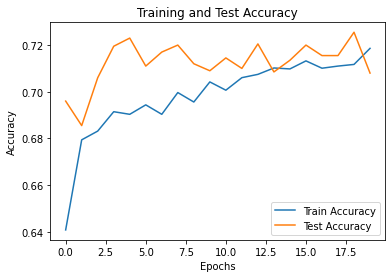

In [6]:
# Визуализация графика точности на обучающей и тестовой выборках
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

# Test time augmentation (TTA)

In [7]:
# Создание генератора аугментированных изображений для тестирования (тестовое время аугментации)
test_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Загрузка предобученной модели VGG16 без верхних слоев
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Замораживание весов предобученной модели
for layer in base_model.layers:
    layer.trainable = False

# Создание новой модели на основе предобученной модели
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели с использованием аугментации данных
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    steps_per_epoch=len(x_train) // 128,
    epochs=20,
    validation_data=test_datagen.flow(x_test, y_test, batch_size=128)
)

Epoch 1/20
78/78 [==============================] - 51s 637ms/step - loss: 0.7400 - accuracy: 0.5276 - val_loss: 0.6616 - val_accuracy: 0.6010
Epoch 2/20
78/78 [==============================] - 45s 572ms/step - loss: 0.6425 - accuracy: 0.6262 - val_loss: 0.6267 - val_accuracy: 0.6570
Epoch 3/20
78/78 [==============================] - 36s 463ms/step - loss: 0.6237 - accuracy: 0.6488 - val_loss: 0.6156 - val_accuracy: 0.6605
Epoch 4/20
78/78 [==============================] - 39s 496ms/step - loss: 0.6112 - accuracy: 0.6645 - val_loss: 0.6077 - val_accuracy: 0.6730
Epoch 5/20
78/78 [==============================] - 44s 561ms/step - loss: 0.6038 - accuracy: 0.6716 - val_loss: 0.5990 - val_accuracy: 0.6680
Epoch 6/20
78/78 [==============================] - 48s 618ms/step - loss: 0.5991 - accuracy: 0.6755 - val_loss: 0.5943 - val_accuracy: 0.6750
Epoch 7/20
78/78 [==============================] - 54s 693ms/step - loss: 0.5982 - accuracy: 0.6767 - val_loss: 0.5892 - val_accuracy: 0.6830

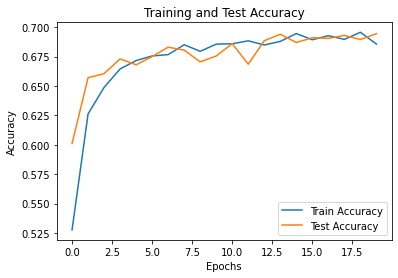

In [8]:
# Визуализация графика точности на обучающей и тестовой выборках
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

<strong>Примечение.</strong> Здесь выше приведен неправильный вариант TTA (TTA должно выполняться на каждом изображении и в качестве итогового предсказания выбираем, например, среднее предсказаний на аугментированных изображениях)

# Albumentations

- https://albumentations.ai/
- https://github.com/albumentations-team/albumentations
- https://demo.albumentations.ai/

In [14]:
# !pip install albumentations

## Пример

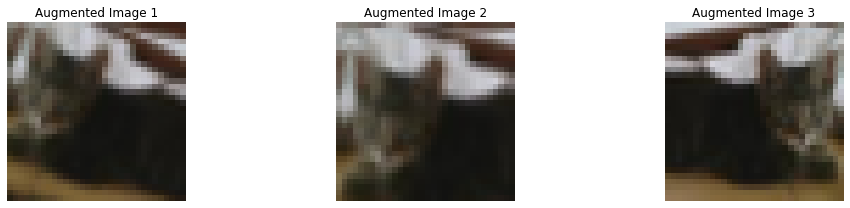

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A

image = x_train[0]

# Создание списка преобразований albumentations
transformations = [
    A.Rotate(limit=20),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=20, p=1),
    A.HorizontalFlip(p=1),
]

# Применение преобразований к изображению
augmented_images = []
for transform in transformations:
    augmented = transform(image=image)
    augmented_image = augmented['image']
    augmented_images.append(augmented_image)

# Отображение примеров аугментации
num_examples = 3
fig, axes = plt.subplots(1, num_examples, figsize=(15, 3))

for i in range(num_examples):
    augmented_image = augmented_images[i]
    axes[i].imshow(augmented_image)
    axes[i].axis('off')
    axes[i].set_title(f'Augmented Image {i + 1}')

plt.tight_layout()
plt.show()

## Обучение

In [125]:
# Определение преобразований Albumentations
transform = A.Compose([
    A.HorizontalFlip(p=0.5),        # Apply horizontal flip with 50% probability
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),   # Apply shift, scale, and rotate with specified limits and 50% probability
    A.RandomBrightnessContrast(p=0.5),   # Apply random brightness and contrast with 50% probability
    A.Normalize()   # Normalize the image
])

# Применение аугментации к обучающим данным
augmented_images = []
augmented_labels = []

for image, label in zip(x_train, y_train):
    augmented = transform(image=image)
    augmented_image = augmented["image"]
    augmented_label = label
    augmented_images.append(augmented_image)
    augmented_labels.append(augmented_label)

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Загрузка предобученной модели VGG16 без верхних слоев
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Замораживание весов предобученной модели
for layer in base_model.layers:
    layer.trainable = False

# Создание новой модели на основе предобученной модели
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели с использованием аугментированных данных
history = model.fit(
    augmented_images, augmented_labels,
    batch_size=128,
    epochs=20,
    validation_data=(x_test, y_test)
)

Epoch 1/20
79/79 [==============================] - 20s 248ms/step - loss: 0.6951 - accuracy: 0.5176 - val_loss: 0.7654 - val_accuracy: 0.5055
Epoch 2/20
79/79 [==============================] - 21s 271ms/step - loss: 0.7011 - accuracy: 0.5116 - val_loss: 0.7363 - val_accuracy: 0.4895
Epoch 3/20
79/79 [==============================] - 23s 297ms/step - loss: 0.6927 - accuracy: 0.5118 - val_loss: 0.7391 - val_accuracy: 0.4950
Epoch 4/20
79/79 [==============================] - 24s 305ms/step - loss: 0.6933 - accuracy: 0.5165 - val_loss: 0.7535 - val_accuracy: 0.4920
Epoch 5/20
79/79 [==============================] - 24s 300ms/step - loss: 0.6946 - accuracy: 0.5179 - val_loss: 0.7705 - val_accuracy: 0.4905
Epoch 6/20
79/79 [==============================] - 23s 298ms/step - loss: 0.6901 - accuracy: 0.5298 - val_loss: 0.7955 - val_accuracy: 0.4880
Epoch 7/20
79/79 [==============================] - 24s 300ms/step - loss: 0.6929 - accuracy: 0.5185 - val_loss: 0.8108 - val_accuracy: 0.4915

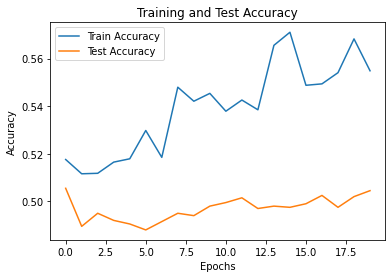

In [126]:
# Визуализация графика точности на обучающей и тестовой выборках
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

## TTA 

In [127]:
from tqdm.auto import tqdm

# Вычисление предсказаний для каждого аугментированного изображения
# Определение аугментаций для TTA
tta_transform = A.Compose([
    A.HorizontalFlip(p=0.5),        # Apply horizontal flip with 50% probability
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),   # Apply shift, scale, and rotate with specified limits and 50% probability
    A.RandomBrightnessContrast(p=0.5),   # Apply random brightness and contrast with 50% probability
    A.Normalize()   # Normalize the image
])

predictions = []
n_augmentations = 5
for image in tqdm(x_test):
    sample_predictions = []
    for i in range(n_augmentations):
        augmented = tta_transform(image=image)
        augmented_image = augmented["image"]
        augmented_image = np.expand_dims(augmented_image, axis=0)
        prediction = model.predict(augmented_image, verbose=0)
        sample_predictions.append(prediction[0])
    predictions.append(np.mean(sample_predictions, axis=0))

# Преобразование final_prediction в метки классов
final_labels = np.argmax(predictions, axis=1)

# Преобразование меток классов y_test в одномерный массив
y_test_labels = np.argmax(y_test, axis=1)

# Вычисление точности (accuracy)
accuracy = np.mean(final_labels == y_test_labels)

print("Accuracy:", accuracy)

  0%|          | 0/2000 [00:00<?, ?it/s]

Accuracy: 0.55


# Домашнее задание

- Добавить в модель из предыдущего задания аугментацию данных (на выбор: с помощью ImageDataGenerator или albumentations)
- Замерить результат финальной обученной модели на тестовых данных с использованием TTA (n аугментаций для каждого изображения из x_test и дальнейшее усреднение предсказаний)
- Сравнить результат на тестовой выборке с использованием TTA и без 

# Интерпретация CNN

## Saliency map

553467096/553467096 [==============================] - 63s 0us/step


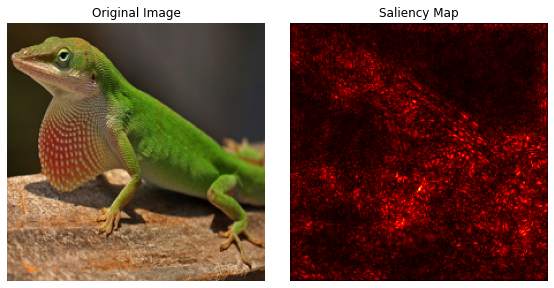

In [70]:
# Загрузка предобученной модели VGG16
model = VGG16(weights='imagenet')

# Загрузка изображения с диска
# image_path = 'n01491361_tiger_shark.JPEG'
image_path = 'n01682714_American_chameleon.JPEG'
image = Image.open(image_path)
image = image.resize((224, 224))  # Изменение размера изображения до 224x224

# Преобразование изображения в массив numpy и нормализация
test_image = np.array(image) / 255.0

# Преобразование изображения в объект типа tf.Tensor
input_image = tf.convert_to_tensor(np.expand_dims(test_image, axis=0))

# Вычисление градиентов функции потерь по входным пикселям (обратный проход)
with tf.GradientTape() as tape:
    tape.watch(input_image)
    predictions = model(input_image)
    loss = predictions[:, np.argmax(predictions)]

# Вычисление градиентов
gradients = tape.gradient(loss, input_image)[0]

# Вычисление значимости пикселей из градиентов
saliency_map = np.max(np.abs(gradients), axis=-1)

# Нормализация значимости пикселей
saliency_map = (saliency_map - np.min(saliency_map)) / (np.max(saliency_map) - np.min(saliency_map))

# Визуализация исходного изображения и saliency map
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(test_image)
axes[0].axis('off')
axes[0].set_title('Original Image')
axes[1].imshow(saliency_map, cmap='hot')
axes[1].axis('off')
axes[1].set_title('Saliency Map')
plt.tight_layout()
plt.show()

## Feature maps

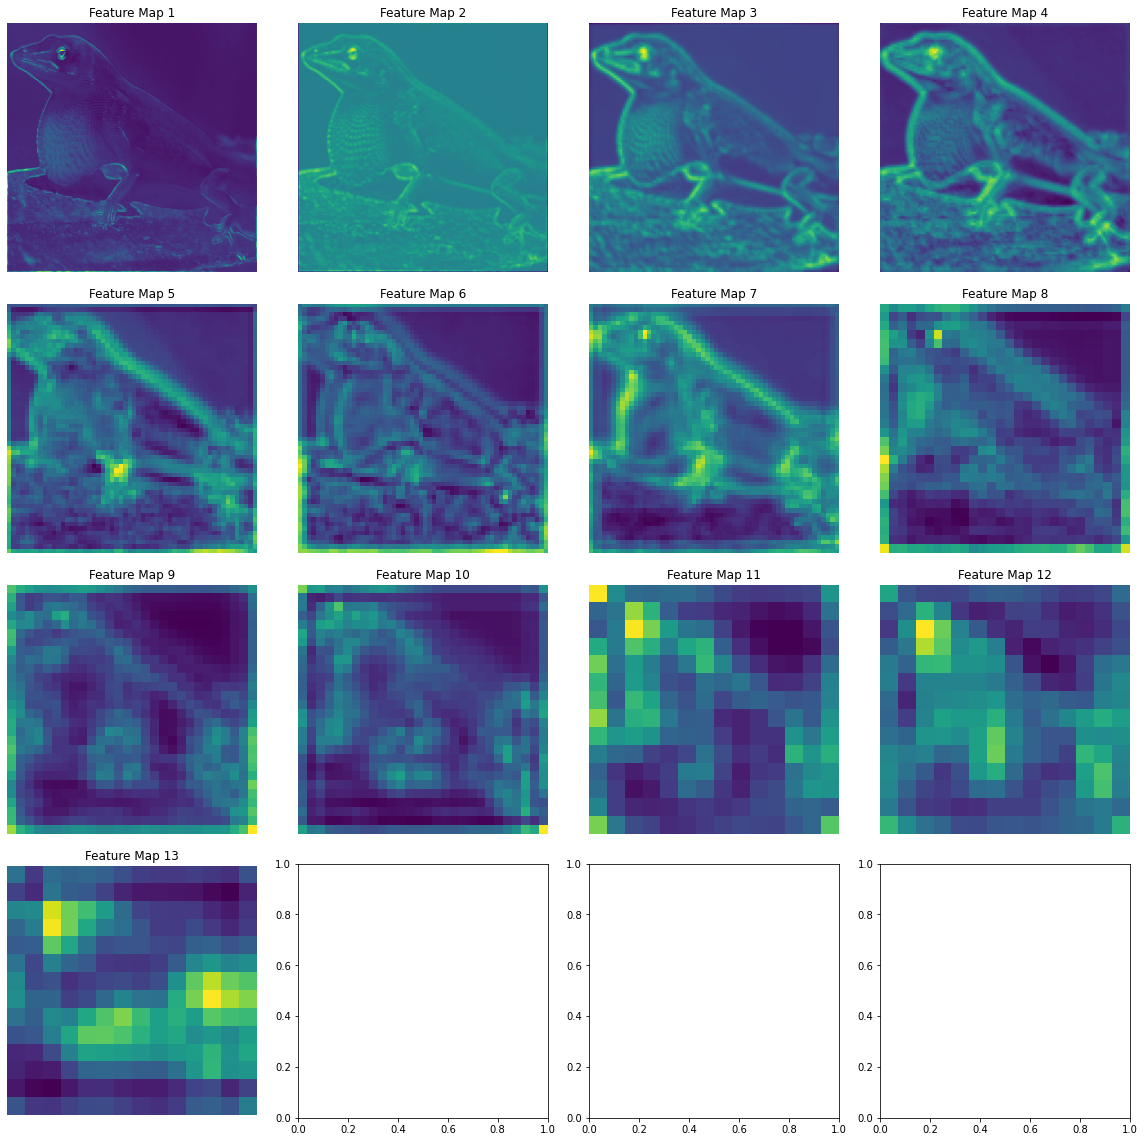

In [71]:
# Get the feature maps from intermediate layers
layer_names = ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2',
               'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1',
               'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2',
               'block5_conv3']
outputs = [model.get_layer(name).output for name in layer_names]
feature_map_model = tf.keras.models.Model(inputs=model.input, outputs=outputs)

# Compute the feature maps from the gradients
feature_maps = feature_map_model(input_image)

num_layers = len(feature_maps)
num_rows = 4
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))

axes[0, 0].imshow(test_image)
axes[0, 0].axis('off')
axes[0, 0].set_title('Original Image')

for i in range(num_layers):
    row = i // num_cols
    col = i % num_cols
    feature_map = np.mean(feature_maps[i][0], axis=-1)    
    axes[row, col].imshow(feature_map, cmap='viridis') #'jet'
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Feature Map {i + 1}')

plt.tight_layout()
plt.show()

## Activation map

1/1 [==============================] - 0s 255ms/step


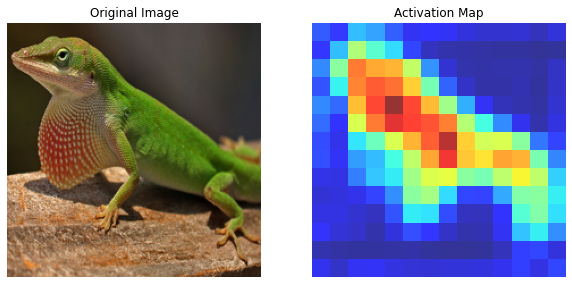

In [76]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input


# Загрузка предобученной модели VGG16
model = VGG16(weights='imagenet', include_top=True)

# Загрузка изображения
img_path = 'n01682714_American_chameleon.JPEG'
img = Image.open(img_path)
img = img.resize((224, 224))  # Изменение размера изображения до 224x224
x = np.array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Получение прогнозов классов
preds = model.predict(x)
class_idx = np.argmax(preds[0])

# Вычисление градиентов активации последнего сверточного слоя
last_conv_layer = model.get_layer('block5_conv3')
grad_model = tf.keras.models.Model([model.inputs], [last_conv_layer.output, model.output])
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(x)
    loss = predictions[:, class_idx]

grads = tape.gradient(loss, conv_outputs)[0]
gate_f = tf.cast(conv_outputs > 0, 'float32')
gate_r = tf.cast(grads > 0, 'float32')
guided_grads = tf.cast(conv_outputs > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

# Взвешивание активаций с помощью глобального среднего пулинга
weights = tf.reduce_mean(guided_grads, axis=(0, 1, 2))
cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)

# Нормализация CAM
cam = np.maximum(cam, 0)
cam /= np.max(cam)

# Визуализация исходного изображения и активаций
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cam[0], cmap='jet', alpha=0.8)
plt.axis('off')
plt.title('Activation Map')
plt.show()

## Lime

In [85]:
# !pip install lime

- https://github.com/marcotcr/lime

  0%|          | 0/100 [00:00<?, ?it/s]

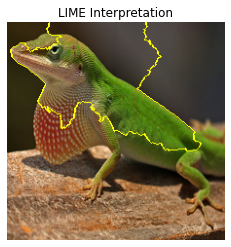

In [99]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Загрузка изображения
image = Image.open(image_path)
image = image.resize((224, 224))  # Изменение размера изображения до 224x224

# Функция, возвращающая предсказания модели
def predict_fn(images):
    # Предобработка изображений перед подачей на модель
#     preprocessed_images = ...  # Ваша предобработка
#     predictions = model.predict(preprocessed_images)
    predictions = model.predict(images, verbose=0)
    return predictions

# Создание объекта LIME для изображений
explainer = lime_image.LimeImageExplainer()

# Объяснение предсказания модели на изображении
explanation = explainer.explain_instance(
    image=np.array(image),
    classifier_fn=predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=25,
)

# Визуализация объяснения
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=True,
)

# Наложение маски на изображение
image_with_mask = mark_boundaries(np.array(image), mask)

# Вывод изображения с маской
plt.imshow(image_with_mask)
plt.axis('off')
plt.title('LIME Interpretation')
plt.show()

## SHAP

In [124]:
# !pip install shap

- https://github.com/slundberg/shap
- https://shap.readthedocs.io/en/latest/example_notebooks/image_examples/image_classification/Explain%20an%20Intermediate%20Layer%20of%20VGG16%20on%20ImageNet.html